# Tutorial for INTERACTIVE STACKED BAR CHART with Matlotplit and Ipywidgets


## Description


### What and Matplotlib and Ipywidgets


[Matplotlib](https://matplotlib.org/) is a Python library that supports creating static, animated, and interactive visualization. Matplotlib has been being used and integrated widely by community, example **Seaborn** is built and integrated with Matplotlib for statical visualization.

[Ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) is also a Python library that support the dynamical interaction in Jupyter Notebook. It allows many flexible configurations and customizations that leverage the **Matplotlib** library into a whole new different experience.


### Dataset


Dataset is about Employment type and Statics Wage in 2021 for all states and territories of the U.S. The dataset is downloaded from [Occupational Employment and Wage Statistics](https://www.bls.gov/oes/tables.htm).


## Import library


`matplotlib` needs to be installed befored using. Run this in your terminal:

`pip install matplotlb`

Also, `pandas` is needed to load dataset, and `ipywidgets` is used for interactive design. Run this in your terminal:

`pip install pandas`

`pip install ipywidgets`

Then, import them as below and try to run them. 

**Note**: Sometime, it depends on the personal libraries in the your local Python folder, so you can install the library that you may miss during your running.


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as iw
from IPython.display import display
import time

## Load and Extract Data


After you download the dataset from the website mentioned above, import it using _pandas_ as below. Remember that you can specify which sheet of the excel file and which column you want to extract by using attribute _sheet_name_ and _usecols_, respectively.


In [2]:
data = pd.read_excel(io="./state_M2021_dl.xlsx",
                     sheet_name="data",
                     usecols=["PRIM_STATE", "OCC_TITLE", "A_MEAN"])
data

,PRIM_STATE,OCC_TITLE,A_MEAN
0,AL,All Occupations,48110
1,AL,Management Occupations,106210
2,AL,Chief Executives,150260
3,AL,General and Operations Managers,113350
4,AL,Legislators,28520
...,...,...,...
37575,VI,Industrial Truck and Tractor Operators,30400
37576,VI,Cleaners of Vehicles and Equipment,28040
37577,VI,"Laborers and Freight, Stock, and Material Move...",30180
37578,VI,"Packers and Packagers, Hand",26320


## Data Preparation


This step will group data into states and terrorities by dropping duplicates rows after selecting _PRIME_STATE_ column only


In [3]:
state = np.array(data["PRIM_STATE"].drop_duplicates())
count = state.__len__()
state, count

(array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
        'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
        'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
        'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY', 'GU', 'PR', 'VI'],
       dtype=object),
 54)

Extract the average income from all occupations by getting rows where _OCC_TITLE_ is _All Occupations_:

`data[(data["OCC_TITLE"] == "All Occupations")]`

Then, extract the _A_MEAN_ column only which contains the average income by using;

`data[(data["OCC_TITLE"] == "All Occupations")]["A_MEAN"]`

Note that, because we will use `np.zeros()` later for visualiztion, which has the `float64` datatype as default, we should convert the data to `float64` when extract them. Same process for `all_occupations_a_mean`, `financial_managers_a_mean`, and `civil_engineers_a_mean`


In [4]:
all_occupations_a_mean = np.array(
    data[(data["OCC_TITLE"] == "All Occupations")]["A_MEAN"], dtype=np.float64)
all_occupations_a_mean

array([48110., 63480., 55170., 46500., 68510., 62900., 66130., 59820.,
       98370., 51950., 53940., 59760., 47940., 59650., 50440., 51140.,
       49680., 48170., 47740., 53230., 65900., 72940., 55160., 60480.,
       42700., 51390., 49340., 52110., 51080., 59270., 67120., 51860.,
       70460., 53100., 53380., 53170., 48360., 59070., 55490., 62120.,
       47490., 46810., 49330., 54230., 53400., 55450., 62330., 68740.,
       46490., 53120., 52110., 39720., 30480., 47980.])

In [5]:
financial_managers_a_mean = np.array(
    data[(data["OCC_TITLE"] == "Financial Managers")]["A_MEAN"],
    dtype=np.float64)
financial_managers_a_mean

array([135090., 118540., 134110., 116460., 166220., 174890., 162270.,
       191020., 174220., 137890., 145580., 123300., 108210., 143300.,
       124690., 122790., 135820., 122760., 119640., 136100., 153500.,
       161230., 134470., 142700., 100600., 138130., 120780., 129300.,
       112790., 138350., 186890., 116320., 206990., 161720., 132190.,
       138480., 127190., 131930., 151760., 169760., 131290., 144310.,
       129250., 154240., 124170., 120280., 164340., 163720., 110460.,
       144900., 114220.,  80610.,  84880., 101940.])

In [6]:
civil_engineers_a_mean = np.array(
    data[(data["OCC_TITLE"] == "Civil Engineers")]["A_MEAN"], dtype=np.float64)
civil_engineers_a_mean

array([ 93820., 106440.,  87240.,  86230., 109890., 100800.,  92760.,
       105620.,  95450.,  94050.,  79720.,  85280.,  85820.,  95670.,
        83800.,  89940.,  89120.,  87220.,  96850.,  89950.,  91770.,
        98910.,  84330.,  95960.,  85910.,  87050.,  79960.,  89000.,
        96400.,  91210., 103140.,  92290.,  99860.,  90920.,  84690.,
        87170.,  95680.,  94200.,  92150., 104010.,  87040.,  82340.,
        89680.,  94470.,  90970.,  78190.,  95170.,  97340.,  90350.,
        83080.,  85290.,  71270.,  62180.,  85930.])

# Draw Stacked Bar Chart:


To draw a stacked bar chart, we use `ax.bar` from the `plt.subplots`. Just like when we draw a stacked bar chart on a paper, we have to keep track of new starting point for each column everytime we draw a bar and want to add a bar on its top. Therefore, the array `bottom` is used to keep track of this. The other methods and attribute setters are straighforward and used below. In order to tweet the visualization, users can increase number of occupations by extracting more occupations in the dataset. However, they have to make sure that the size of the occupation income has to be same as the state size.


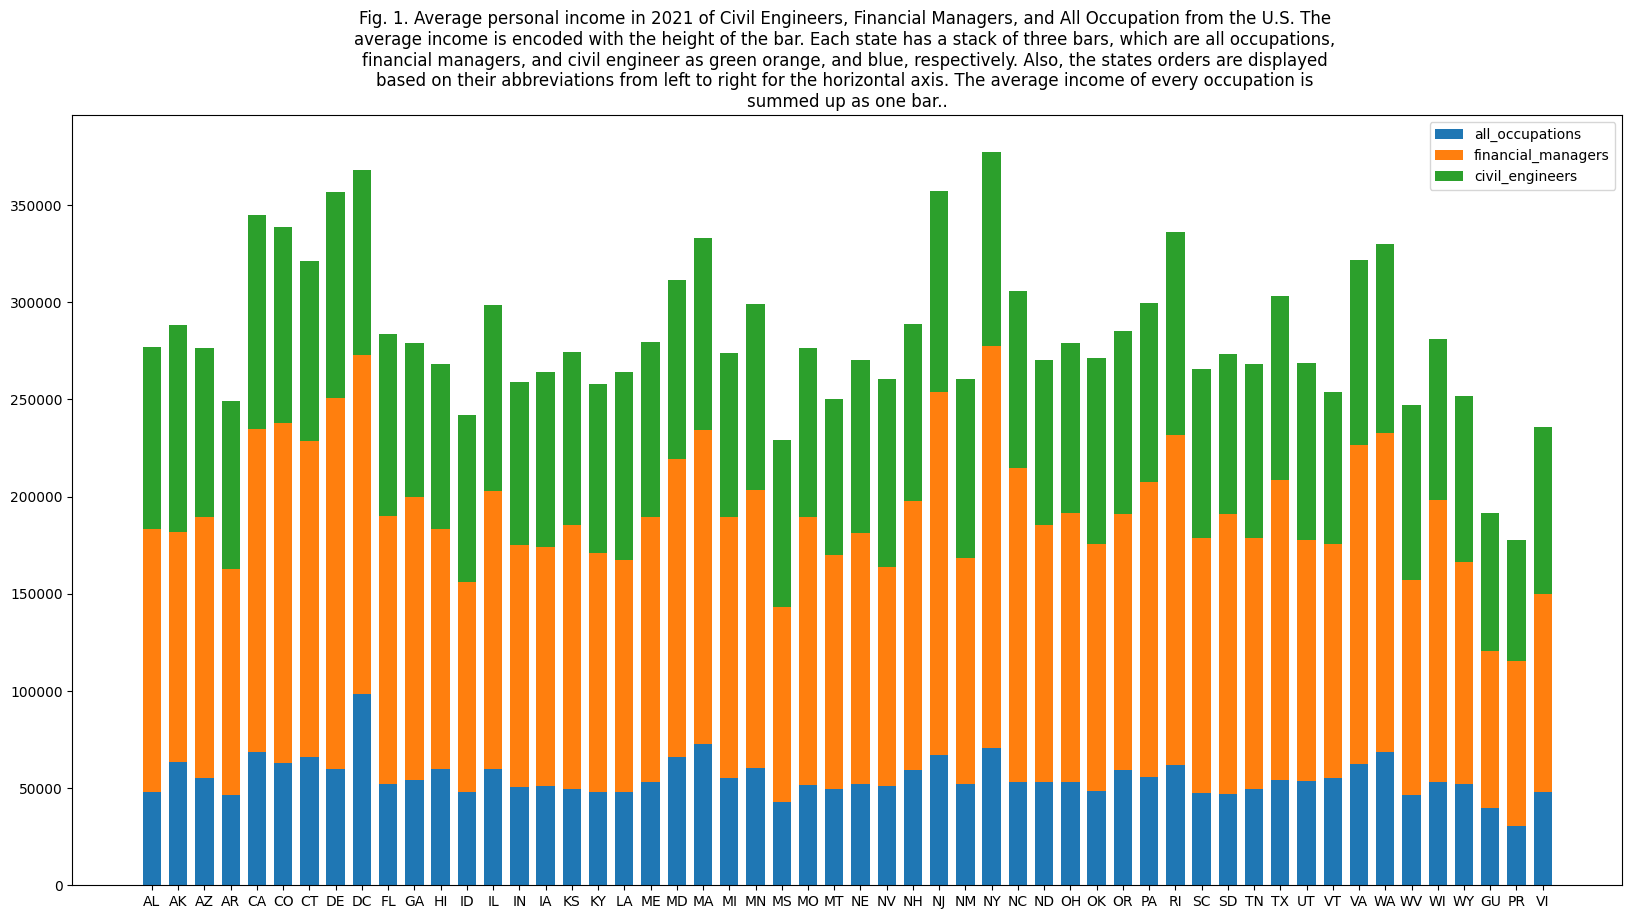

In [7]:
a_means = {
    "all_occupations": all_occupations_a_mean,
    "financial_managers": financial_managers_a_mean,
    "civil_engineers": civil_engineers_a_mean
}

width = 0.7

fig, ax = plt.subplots()
bottom = np.zeros(count)

fig.set_figwidth(20)
fig.set_figheight(10)

for boolean, a_mean in a_means.items():
    p = ax.bar(state, a_mean, width, label=boolean, bottom=bottom)
    bottom += a_mean

ax.set_title(
    'Fig. 1. Average personal income in 2021 of Civil Engineers, Financial Managers, and All Occupation from the U.S. The \naverage income is encoded with the height of the bar. Each state has a stack of three bars, which are all occupations, \nfinancial managers, and civil engineer as green orange, and blue, respectively. Also, the states orders are displayed \nbased on their abbreviations from left to right for the horizontal axis. The average income of every occupation is \nsummed up as one bar..'
)
ax.legend(loc="upper right")

plt.show()

# Draw Stacked Bar Charts with Users' Interactions

## Support functions


The `A_mean_state_occupations` is used for extracting annual mean salary from data (`A_MEAN`). This function accept a list of state abbreviations and a list of occupations as the parameters and will return a dataframe with passed state abbreviations and occupations.

In [8]:
tmp_result = data.loc[~data["PRIM_STATE"].isin(['GU', 'PR', 'VI'])]
def A_mean_state_occupations(states=None | list, occupations=None | list) -> None|pd.DataFrame:
    '''
        @states is a list of string of state abbreviation.
        @occupations is a list of string of available occupations in the income_df.
        @return dataframe that is filtered from @states and @occupations.
        @notes: replace "*" by 0, "#" by 208000 and "**" by NAN
    '''
    result = None
    if states==None and occupations==None:
        result = tmp_result
    elif states!=None and occupations!=None:
        result = tmp_result.loc[tmp_result["PRIM_STATE"].isin(states) & tmp_result["OCC_TITLE"].isin(occupations)]
    elif states==None:
        result = tmp_result.loc[tmp_result["OCC_TITLE"].isin(occupations)]
    elif occupations==None:
        result = tmp_result.loc[tmp_result["PRIM_STATE"].isin(states)]
    if result.__len__() != 0:
        return result.replace(['*', '#', '**'], [0, 208000,  np.nan])
    return None

test = A_mean_state_occupations(states=['AL', 'AK', 'VA','CA'], occupations=['Compensation and Benefits Managers', 'Architects, Except Landscape and Naval'])
test

,PRIM_STATE,OCC_TITLE,A_MEAN
17,AL,Compensation and Benefits Managers,113830
86,AL,"Architects, Except Landscape and Naval",0
820,AK,"Architects, Except Landscape and Naval",99980
2776,CA,Compensation and Benefits Managers,149670
2855,CA,"Architects, Except Landscape and Naval",100790
33045,VA,Compensation and Benefits Managers,149550
33122,VA,"Architects, Except Landscape and Naval",88060


## The Vis

This is the most significant improvement in comparison with the normal Stacked Bar Charts above as it includes the interacting capabilities. With this interactive graph, users can actively choose which states and occupations they want to include. Therefore, this can help solving the challenges of the Stacked Bar Chart: The amount of bars, the amount of stacked portion, and the order of the stacked portion (kind of).

----------
**Instruction:**
1. Choose the states you want (limit the amount for best visualization)
2. Choose the occupations you want to compares (also limit the amount)
3. Reset the visualization by choose different states and occupations

----------


In [9]:
states = data["PRIM_STATE"].drop_duplicates()
state_value = [np.array(states)[0]]

# output to display the visualizations and interactive tools
out = iw.Output()
# the control box where all the interations happen
controls = iw.VBox()


# this makes sure the vis gets cleared before new vis gets drawn
@out.capture(clear_output=True, wait=True)
def draw_stacked_bar_chart(change):
    # get the stack from the first SelectMultiple
    states = sel_st.value
    # occupations will be updated every time users pick new occupations
    occupations = change.new
    a_means = {}
    # get raw data from the support function
    raw_data = A_mean_state_occupations(states=states, occupations=occupations)
    # add data to a_means
    for occupation in occupations:
        a_means[occupation] = np.array(
            raw_data[(raw_data["OCC_TITLE"] == occupation)]["A_MEAN"],
            dtype=np.float64)
    # set up the plot
    width = 0.7
    count = states.__len__()
    fig, ax = plt.subplots()
    # accumulator for the stacked bar charts
    bottom = np.zeros(count)
    fig.set_figwidth(20)
    fig.set_figheight(20)
    # draw the stacked bar charts
    for boolean, a_mean in a_means.items():
        p = ax.bar(states, a_mean, width, label=boolean, bottom=bottom)
        bottom += a_mean
    # The title templates are used for generating dynamical title
    title_1 = 'Fig. 1. Average personal income in 2021 of '
    title_2 = ' from the U.S. The average income is encoded with the height of the bar. Each state has a stack of three bars, which are all occupations, financial managers, and civil engineer as green orange, and blue, respectively. Also, the states orders are displayed based on their abbreviations from left to right for the horizontal axis. The average income of every occupation is summed up as one bar.'
    title = ''
    # max len of each line
    max_len = 100
    sub_title = []
    # the process of generating th dynamical title
    if list(occupations).__len__() >= 4:
        title = title_1 + occupations[0] + ', ' + occupations[
            1] + ', ' + occupations[2] + ', ' + occupations[
                3] + ', and etc ' + title_2
        new_line_nums = title.__len__() // max_len
        for i in range(0, new_line_nums - 1):
            sub_title.append(title[i * max_len:(i + 1) * max_len])
        sub_title.append(" " + title[(new_line_nums - 1) * max_len:])
    else:
        title = title + title_1
        for i in range(0, occupations.__len__() - 1):
            title = title + occupations[i] + ", "
        title = title = title + ", and" + occupations[-1] + title_2
        new_line_nums = title.__len__() // max_len
        for i in range(0, new_line_nums - 1):
            sub_title.append(title[i * max_len:(i + 1) * max_len])
        sub_title.append(" " + title[(new_line_nums - 1) * max_len:])
    title = ''
    for sub in sub_title:
        title = title + sub + "\n"
    ax.set_title(title)
    ax.legend(loc="best")
    plt.show()


# this is used for catch the change from the states selection
# then it generate the available occupations from the states
# by using set intersection method to make sure all states
# has the same occupations
@out.capture(clear_output=True, wait=True)
def update_occupations(change):
    if change.name == 'value':
        available_occupations = None
        # put the first one in the available_occupations
        if len(change.new) != 0:
            available_occupations = set(
                np.array(
                    data[data["PRIM_STATE"] == change.new[0]]["OCC_TITLE"]))
        # intersecting occupations
        for state in change.new:
            available_occupations = available_occupations.intersection(
                set(np.array(data[data["PRIM_STATE"] == state]["OCC_TITLE"])))

        # adding occupations to the second SelectMultiple
        available_occupations = pd.Series(list(available_occupations))
        occ_value = [np.array(available_occupations)[0]]
        sel_occ = iw.SelectMultiple(
            rows=10,
            options=available_occupations,
            value=occ_value,
            description="Occupations",
            disable=False,
        )
        # set the eventlistener
        sel_occ.observe(draw_stacked_bar_chart, names='value')
        children = list(controls.children)
        # have to clear the controls children to make sure
        # that the control alway has only 2 SelectMultiple
        if children.__len__() > 1:
            children.pop(1)
            children.append(sel_occ)
            controls.children = tuple(children)


sel_st = iw.SelectMultiple(options=states,
                           value=state_value,
                           rows=10,
                           description='States',
                           disabled=False)

sel_st.observe(update_occupations, names='value')

controls.children += (sel_st, )
# dummy second SelectMultiple
controls.children += (iw.SelectMultiple(disable=True), )

display(iw.VBox([controls, out]))